# Abhijit Gaikwad - E-Commerece products analysis project using both the tech SQL + PYTHON EDA

# E-commerece products analysis project using both the tech SQL + PYTHON EDA

## Installing all packages required example numpy,pandas,mysql-connector,matplotlib and seaborn.

In [1]:
!pip install mysql-connector-python


   ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.3 MB 991.0 kB/s eta 0:00:15
    --------------------------------------- 0.2/14.3 MB 2.8 MB/s eta 0:00:06
   - -------------------------------------- 0.4/14.3 MB 3.0 MB/s eta 0:00:05
   - -------------------------------------- 0.5/14.3 MB 3.3 MB/s eta 0:00:05
   - -------------------------------------- 0.7/14.3 MB 2.9 MB/s eta 0:00:05
   - -------------------------------------- 0.7/14.3 MB 2.7 MB/s eta 0:00:06
   -- ------------------------------------- 0.8/14.3 MB 2.4 MB/s eta 0:00:06
   -- ------------------------------------- 0.9/14.3 MB 2.4 MB/s eta 0:00:06
   -- ------------------------------------- 1.0/14.3 MB 2.5 MB/s eta 0:00:06
   --- ------------------------------------ 1.1/14.3 MB 2.4 MB/s eta 0:00:06
   --- ------------------------------------ 1.2/14.3 MB 2.4 MB/s eta 0:00:06
   --- ------------------------------------ 1.3/14.3 MB 2.4 MB/s eta 0:00:06
   -

In [3]:
!pip install seaborn

## Python script to load files of data into mysql

In [5]:
!pip install matplotlib

## Building connection with mysql server , loading one simple query


In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

db = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Abhi@123',
    database='ecommerce'
)

cur = db.cursor()

query = """ select distinct upper((customer_city)) from customers """
cur.execute(query)
data= cur.fetchall()
data
df = pd.DataFrame(data , columns = ["Unique cities of customers"])
df

,Unique cities of customers
0,FRANCA
1,SAO BERNARDO DO CAMPO
2,SAO PAULO
3,MOGI DAS CRUZES
4,CAMPINAS
...,...
4114,SIRIJI
4115,NATIVIDADE DA SERRA
4116,MONTE BONITO
4117,SAO RAFAEL


## Numbers of orders placed in year 2017

In [23]:
query = """ select count(order_id) from orders where year(order_purchase_timestamp) = 2017 """
cur.execute(query)
data= cur.fetchall()
data

[(45101,)]

## Categories wise sales 


In [94]:
query = """
select 
    upper(products.product_category) as category,
    round(sum(payments.payment_value), 2) as sales
from 
    products
join 
    order_items on products.product_id = order_items.product_id
join 
    payments on payments.order_id = order_items.order_id
group by 
    category
order by
    sales desc,
    category asc
"""

cur.execute(query)
data= cur.fetchall()
data
df = pd.DataFrame(data , columns = ["Categories" , "Sales_totals"])
df

,Categories,Sales_totals
0,BED TABLE BATH,1712553.67
1,HEALTH BEAUTY,1657373.12
2,COMPUTER ACCESSORIES,1585330.45
3,FURNITURE DECORATION,1430176.39
4,WATCHES PRESENT,1429216.68
...,...,...
69,PC GAMER,2174.43
70,HOUSE COMFORT 2,1710.54
71,CDS MUSIC DVDS,1199.43
72,FASHION CHILDREN'S CLOTHING,785.67


## Segmentation in % of orders paid in instalments skiping one time payment

In [61]:
query = """ select round((sum(case when payment_installments > 1 then 1
else 0 end ))/count(*)*100,2) from payments """
cur.execute(query)
data= cur.fetchall()
data

[(Decimal('49.42'),)]

## Count of state-wise customers

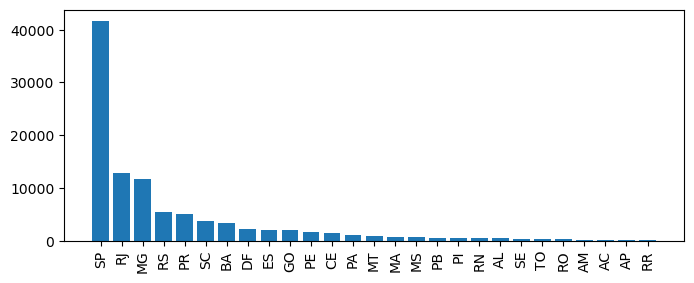

In [77]:
query = """ select customer_state, count(customer_id) from customers group by customer_state """
cur.execute(query)
data= cur.fetchall()
data
df = pd.DataFrame(data , columns = ["State" , "Customer_count" ])
df= df.sort_values(by ="Customer_count" ,ascending= False)

plt.figure(figsize = (8,3))
plt.bar(df["State"],df["Customer_count"])
plt.xticks(rotation=90)
plt.show()

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

db = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Abhi@123',
    database='ecommerce'
)

cur = db.cursor()

## Calculate the number of orders per month in 2018


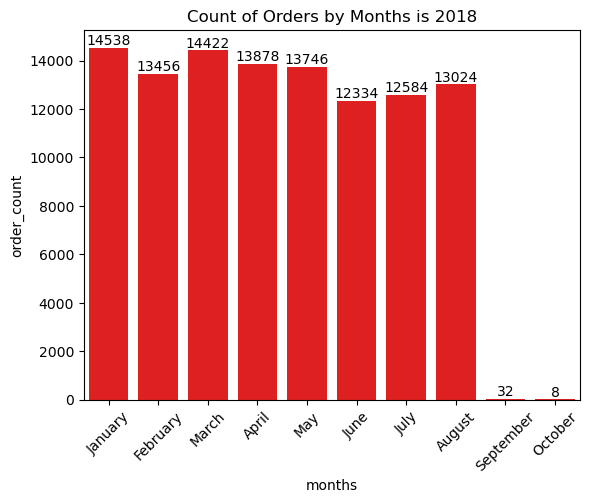

In [83]:
query = """ select monthname(order_purchase_timestamp) months, count(order_id) order_count
from orders where year(order_purchase_timestamp) = 2018
group by months
"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ["months", "order_count"])
o = ["January", "February","March","April","May","June","July","August","September","October"]

ax = sns.barplot(x = df["months"],y =  df["order_count"], data = df, order = o, color = "red")
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0])
plt.title("Count of Orders by Months is 2018")

plt.show()

## Find the average number of products per order, grouped by customer city.

In [87]:
query = """with count_per_order as 
(select orders.order_id, orders.customer_id, count(order_items.order_id) as oc
from orders join order_items
on orders.order_id = order_items.order_id
group by orders.order_id, orders.customer_id)

select customers.customer_city, round(avg(count_per_order.oc),2) average_orders
from customers join count_per_order
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city order by average_orders desc
"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data,columns = ["customer city", "average products/order"])
df.head(10)

,customer city,average products/order
0,padre carvalho,14.00
1,celso ramos,13.00
2,datas,12.00
3,candido godoi,12.00
4,matias olimpio,10.00
5,cidelandia,8.00
6,curralinho,8.00
7,picarra,8.00
8,morro de sao paulo,8.00
9,teixeira soares,8.00


## Calculate the percentage of total revenue contributed by each product category.

In [90]:
query = """select upper(products.product_category) category, 
round((sum(payments.payment_value)/(select sum(payment_value) from payments))*100,2) sales_percentage
from products join order_items 
on products.product_id = order_items.product_id
join payments 
on payments.order_id = order_items.order_id
group by category order by sales_percentage desc"""


cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["Category", "percentage distribution"])
df.head()

,Category,percentage distribution
0,BED TABLE BATH,21.40
1,HEALTH BEAUTY,20.71
2,COMPUTER ACCESSORIES,19.81
3,FURNITURE DECORATION,17.87
4,WATCHES PRESENT,17.86


## Identify the correlation between product price and the number of times a product has been purchased.

In [93]:
query = """select products.product_category, 
count(order_items.product_id),
round(avg(order_items.price),2)
from products join order_items
on products.product_id = order_items.product_id
group by products.product_category"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["Category", "order_count","price"])

arr1 = df["order_count"]
arr2 = df["price"]

a = np.corrcoef([arr1,arr2])
print("the correlation is", a[0][-1])

the correlation is -0.10631514167157562


## Calculate the total revenue generated by each seller, and rank them by revenue.

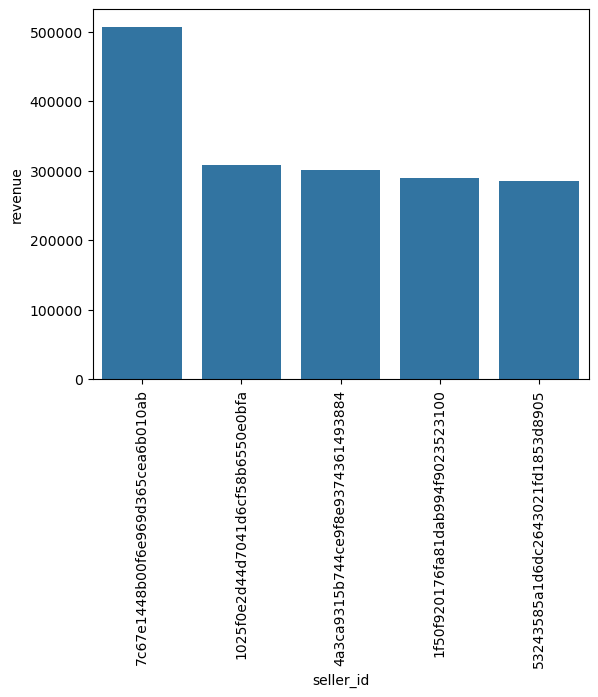

In [96]:
query = """ select *, dense_rank() over(order by revenue desc) as rn from
(select order_items.seller_id, sum(payments.payment_value)
revenue from order_items join payments
on order_items.order_id = payments.order_id
group by order_items.seller_id) as a """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["seller_id", "revenue", "rank"])
df = df.head()
sns.barplot(x = "seller_id", y = "revenue", data = df)
plt.xticks(rotation = 90)
plt.show()

## Calculate the moving average of order values for each customer over their order history.

In [99]:
query = """select customer_id, order_purchase_timestamp, payment,
avg(payment) over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as mov_avg
from
(select orders.customer_id, orders.order_purchase_timestamp, 
payments.payment_value as payment
from payments join orders
on payments.order_id = orders.order_id) as a"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data)
df

,0,1,2,3
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
2,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
3,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
4,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
...,...,...,...,...
207767,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13,214.130005
207768,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000
207769,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000
207770,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001


## Calculate the cumulative sales per month for each year.

In [102]:
query = """select years, months , payment, sum(payment)
over(order by years, months) cumulative_sales from 
(select year(orders.order_purchase_timestamp) as years,
month(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id = payments.order_id
group by years, months order by years, months) as a
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data)
df

,0,1,2,3
0,2016,9,504.48,504.48
1,2016,10,118180.96,118685.44
2,2016,12,39.24,118724.68
3,2017,1,276976.08,395700.76
4,2017,2,583816.02,979516.78
5,2017,3,899727.20,1879243.98
6,2017,4,835576.06,2714820.04
7,2017,5,1185837.64,3900657.68
8,2017,6,1022552.76,4923210.44
9,2017,7,1184765.84,6107976.28


## Calculate the year-over-year growth rate of total sales.

In [105]:
query = """with a as(select year(orders.order_purchase_timestamp) as years,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id = payments.order_id
group by years order by years)

select years, ((payment - lag(payment, 1) over(order by years))/
lag(payment, 1) over(order by years)) * 100 from a"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["years", "yoy % growth"])
df

,years,yoy % growth
0,2016,NaN
1,2017,12112.703761
2,2018,20.000924


## Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [108]:
query = """with a as (select customers.customer_id,
min(orders.order_purchase_timestamp) first_order
from customers join orders
on customers.customer_id = orders.customer_id
group by customers.customer_id),

b as (select a.customer_id, count(distinct orders.order_purchase_timestamp) next_order
from a join orders
on orders.customer_id = a.customer_id
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp < 
date_add(first_order, interval 6 month)
group by a.customer_id) 

select 100 * (count( distinct a.customer_id)/ count(distinct b.customer_id)) 
from a left join b 
on a.customer_id = b.customer_id ;"""

cur.execute(query)
data = cur.fetchall()

data

[(None,)]

## Identify the top 3 customers who spent the most money in each year.

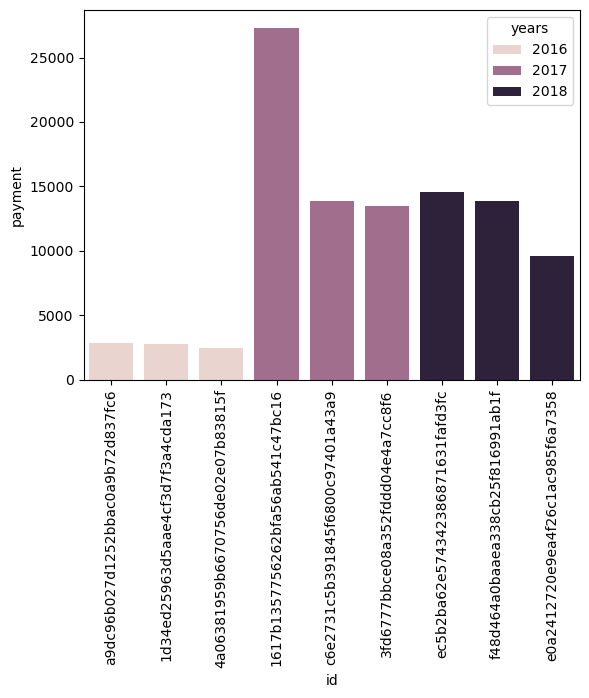

In [111]:
query = """select years, customer_id, payment, d_rank
from
(select year(orders.order_purchase_timestamp) years,
orders.customer_id,
sum(payments.payment_value) payment,
dense_rank() over(partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value) desc) d_rank
from orders join payments 
on payments.order_id = orders.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id) as a
where d_rank <= 3 ;"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["years","id","payment","rank"])
sns.barplot(x = "id", y = "payment", data = df, hue = "years")
plt.xticks(rotation = 90)
plt.show()